In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats

In [ ]:
data = pd.read_csv('Diabetic_Main_DS_No1.csv')
season = {'Cold': 1, 'Warm': 0}
discharge = {'Released': 0, 'Deceased': 1}
data.replace({"Season": season, "Discharge_Status": discharge}, inplace = True)
data

,Season,Age_Category,Gender,Maritial_Status,Underlying_Disease,LOS_Month,SP_LOS_Month,HasSpecialSection,Triage_Level,CPR,remdesivir,Favipiravir,Insulin,Connect_to_Ventilator,Dialysis,Discharge_Status
0,1,3,1,3,1,0,0,0,3,0,0,0,1,0,0,0
1,1,3,1,3,1,0,0,0,2,0,0,0,1,0,0,0
2,1,3,1,1,1,0,0,0,2,0,0,0,1,0,0,0
3,1,3,2,3,1,2,0,0,2,1,0,0,1,1,0,1
4,1,3,1,1,1,0,0,0,2,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,0,4,2,3,1,1,0,0,2,0,0,0,1,0,0,0
2820,1,4,1,3,1,0,0,0,2,0,0,0,1,0,0,0
2821,1,3,2,3,1,0,0,0,2,0,1,0,1,0,0,0
2822,1,2,1,3,1,0,0,1,2,0,0,0,1,0,0,1


In [ ]:
data.rename(columns={'CPR': 'PCR'}, inplace = True)
data

,Season,Age_Category,Gender,Maritial_Status,Underlying_Disease,LOS_Month,SP_LOS_Month,HasSpecialSection,Triage_Level,PCR,remdesivir,Favipiravir,Insulin,Connect_to_Ventilator,Dialysis,Discharge_Status
0,1,3,1,3,1,0,0,0,3,0,0,0,1,0,0,0
1,1,3,1,3,1,0,0,0,2,0,0,0,1,0,0,0
2,1,3,1,1,1,0,0,0,2,0,0,0,1,0,0,0
3,1,3,2,3,1,2,0,0,2,1,0,0,1,1,0,1
4,1,3,1,1,1,0,0,0,2,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,0,4,2,3,1,1,0,0,2,0,0,0,1,0,0,0
2820,1,4,1,3,1,0,0,0,2,0,0,0,1,0,0,0
2821,1,3,2,3,1,0,0,0,2,0,1,0,1,0,0,0
2822,1,2,1,3,1,0,0,1,2,0,0,0,1,0,0,1


In [ ]:
data.describe()

,Season,Age_Category,Gender,Maritial_Status,Underlying_Disease,LOS_Month,SP_LOS_Month,HasSpecialSection,Triage_Level,PCR,remdesivir,Favipiravir,Insulin,Connect_to_Ventilator,Dialysis,Discharge_Status
count,2824.000000,2824.000000,2824.000000,2824.000000,2824.0,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.0,2824.000000,2824.000000,2824.000000
mean,0.497521,2.869334,1.490085,2.168555,1.0,0.237606,0.092068,0.406870,2.282224,0.083569,0.316218,0.155453,1.0,0.101275,0.080737,0.241501
std,0.500082,0.580344,0.499990,0.974301,0.0,0.481895,0.326025,0.491337,1.116340,0.276790,0.465082,0.362400,0.0,0.301746,0.272478,0.428069
min,0.000000,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,3.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
75%,1.000000,3.000000,2.000000,3.000000,1.0,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000
max,1.000000,4.000000,2.000000,3.000000,1.0,5.000000,5.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


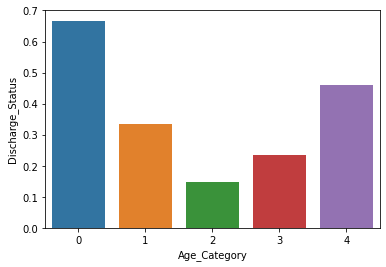

In [ ]:
sns.barplot(x='Age_Category', y='Discharge_Status', data=data, ci=None)

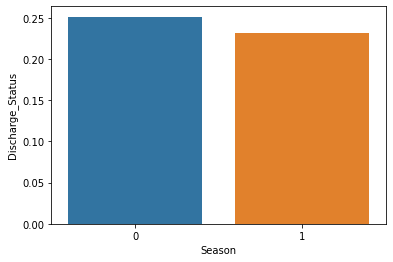

In [ ]:
sns.barplot(x='Season', y='Discharge_Status', data=data, ci=None)

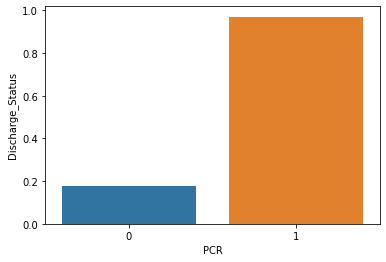

In [ ]:
sns.barplot(x='PCR', y='Discharge_Status', data=data, ci=None)

In [ ]:
data.columns

Index(['Season', 'Age_Category', 'Gender', 'Maritial_Status',
       'Underlying_Disease', 'LOS_Month', 'SP_LOS_Month', 'HasSpecialSection',
       'Triage_Level', 'PCR', 'remdesivir', 'Favipiravir', 'Insulin',
       'Connect_to_Ventilator', 'Dialysis', 'Discharge_Status'],
      dtype='object')

In [ ]:
#observed-values
narrow = pd.crosstab(data.Gender, data.Discharge_Status, margins=True, margins_name="Total")
narrow

Discharge_Status,0,1,Total
Gender,,,
1,1065,375,1440
2,1077,307,1384
Total,2142,682,2824


##calculate CHI2

In [ ]:
narrow = pd.crosstab(data.Triage_Level, data.Discharge_Status, margins=True, margins_name="Total")
narrow

Discharge_Status,0,1,Total
Triage_Level,,,
0,281,91,372
1,16,21,37
2,770,334,1104
3,901,195,1096
4,137,27,164
5,37,13,50
6,0,1,1
Total,2142,682,2824


In [ ]:
narrow = pd.crosstab(data.Triage_Level, data.Age_Category, margins=True, margins_name="Total")
narrow

Age_Category,0,1,2,3,4,Total
Triage_Level,,,,,,
0,0,7,82,246,37,372
1,0,0,6,23,8,37
2,2,7,195,768,132,1104
3,4,7,254,750,81,1096
4,0,0,37,116,11,164
5,0,0,11,33,6,50
6,0,0,0,0,1,1
Total,6,21,585,1936,276,2824


In [ ]:
narrow = pd.crosstab(data.PCR, data.HasSpecialSection, margins=True, margins_name="Total")
narrow

HasSpecialSection,0,1,Total
PCR,,,
0,1563,1025,2588
1,112,124,236
Total,1675,1149,2824


In [ ]:
narrow = pd.crosstab(data.Dialysis, data.Age_Category, margins=True, margins_name="Total")
narrow

Age_Category,0,1,2,3,4,Total
Dialysis,,,,,,
0,6,19,539,1778,254,2596
1,0,2,46,158,22,228
Total,6,21,585,1936,276,2824


In [ ]:
narrow = pd.crosstab(data.Triage_Level, data.Age_Category, margins=True, margins_name="Total")
narrow

In [ ]:
e01 = narrow[0]['Total']*narrow['Total'][1]/narrow['Total']['Total']
e01
e11 = narrow[1]['Total']*narrow['Total'][1]/narrow['Total']['Total']
e11
e02 = narrow[0]['Total']*narrow['Total'][2]/narrow['Total']['Total']
e02
e12 = narrow[1]['Total']*narrow['Total'][2]/narrow['Total']['Total']
e12

334.23796033994336

In [ ]:
def chi2(df, col1, col2):    
    #create the contingency table
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)

    #sum up the totals for row and columns
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('Observed (O)')
    display(df_cont)

    #create the expected value dataframe
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
    print('Expected (E)')
    display(df_exp)
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('-------------Chi-Square-------------')
    display(df_chi2)
    #get chi-square score  
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    return chi_square_score, degree_f

In [ ]:
chi_score, degree_f = chi2(data,'Gender','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
Gender,,,
1,1065,375,1440
2,1077,307,1384
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
Gender,,,
1,1092.23796,347.76204,1440.0
2,1049.76204,334.23796,1384.0
Total,2142.00000,682.00000,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
Gender,,,
1,0.679254,2.133374,2.812627
2,0.706738,2.219695,2.926433
Total,1.385991,4.353069,5.739061


Chi2_score: 5.739060726364809, Degrees of freedom: 1


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(5.7390, 1)))

p-value is 0.01659223653436437


In [ ]:
chi_score, degree_f = chi2(data,'Season','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
Season,,,
0,1062,357,1419
1,1080,325,1405
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
Season,,,
0,1076.30949,342.69051,1419.0
1,1065.69051,339.30949,1405.0
Total,2142.00000,682.00000,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
Season,,,
0,0.190244,0.597511,0.787756
1,0.192140,0.603465,0.795605
Total,0.382384,1.200977,1.583361


Chi2_score: 1.5833605947691052, Degrees of freedom: 1


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(1.5833, 1)))

p-value is 0.20828599478705945


In [ ]:
chi_score, degree_f = chi2(data,'Age_Category','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
Age_Category,,,
0,2,4,6
1,14,7,21
2,498,87,585
3,1479,457,1936
4,149,127,276
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
Age_Category,,,
0,4.550992,1.449008,6.0
1,15.928470,5.071530,21.0
2,443.721671,141.278329,585.0
3,1468.453258,467.546742,1936.0
4,209.345609,66.654391,276.0
Total,2142.000000,682.000000,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
Age_Category,,,
0,1.429921,4.491042,5.920963
1,0.233481,0.733309,0.966790
2,6.639606,20.853424,27.493030
3,0.075749,0.237909,0.313658
4,17.395123,54.633948,72.029071
Total,25.773879,80.949633,106.723512


Chi2_score: 106.72351180116027, Degrees of freedom: 4


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(106.7235, 4)))

p-value is 0.0


In [ ]:
chi_score, degree_f = chi2(data,'Maritial_Status','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
Maritial_Status,,,
1,876,266,1142
2,54,10,64
3,1212,406,1618
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
Maritial_Status,,,
1,866.205382,275.794618,1142.0
2,48.543909,15.456091,64.0
3,1227.250708,390.749292,1618.0
Total,2142.000000,682.000000,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
Maritial_Status,,,
1,0.110753,0.347848,0.458600
2,0.613237,1.926032,2.539269
3,0.189516,0.595226,0.784742
Total,0.913506,2.869106,3.782612


Chi2_score: 3.782611733133276, Degrees of freedom: 2


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(3.7826, 2)))

p-value is 0.15087554308526252


In [ ]:
chi_score, degree_f = chi2(data,'Underlying_Disease','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
Underlying_Disease,,,
1,2142,682,2824
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
Underlying_Disease,,,
1,2142.0,682.0,2824.0
Total,2142.0,682.0,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
Underlying_Disease,,,
1,0.0,0.0,0.0
Total,0.0,0.0,0.0


Chi2_score: 0.0, Degrees of freedom: 0


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(0, 0)))

p-value is nan


In [ ]:
chi_score, degree_f = chi2(data,'HasSpecialSection','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
HasSpecialSection,,,
0,1511,164,1675
1,631,518,1149
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
HasSpecialSection,,,
0,1270.485127,404.514873,1675.0
1,871.514873,277.485127,1149.0
Total,2142.000000,682.000000,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
HasSpecialSection,,,
0,45.531744,143.004393,188.536138
1,66.375693,208.470286,274.845979
Total,111.907438,351.474679,463.382117


Chi2_score: 463.38211688642303, Degrees of freedom: 1


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(463.382, 1)))

p-value is 0.0


In [ ]:
chi_score, degree_f = chi2(data,'Triage_Level','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
Triage_Level,,,
0,281,91,372
1,16,21,37
2,770,334,1104
3,901,195,1096
4,137,27,164
5,37,13,50
6,0,1,1
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
Triage_Level,,,
0,282.161473,89.838527,372.0
1,28.064448,8.935552,37.0
2,837.382436,266.617564,1104.0
3,831.314448,264.685552,1096.0
4,124.393768,39.606232,164.0
5,37.924929,12.075071,50.0
6,0.758499,0.241501,1.0
Total,2142.000000,682.000000,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
Triage_Level,,,
0,0.004781,0.015016,0.019797
1,5.186309,16.288964,21.475273
2,5.422126,17.029608,22.451734
3,5.841443,18.346586,24.188029
4,1.277533,4.012426,5.289959
5,0.022558,0.070848,0.093406
6,0.758499,2.382264,3.140762
Total,18.513248,58.145713,76.658961


Chi2_score: 76.65896065883038, Degrees of freedom: 6


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(76.6589, 6)))

p-value is 1.7430501486614958e-14


In [ ]:
chi_score, degree_f = chi2(data, 'PCR','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
PCR,,,
0,2135,453,2588
1,7,229,236
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
PCR,,,
0,1962.994334,625.005666,2588.0
1,179.005666,56.994334,236.0
Total,2142.000000,682.000000,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
PCR,,,
0,15.071846,47.337089,62.408936
1,165.279400,519.103336,684.382736
Total,180.351246,566.440425,746.791672


Chi2_score: 746.7916715154693, Degrees of freedom: 1


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(746.7916, 1)))

p-value is 0.0


In [ ]:
chi_score, degree_f = chi2(data, 'remdesivir','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
remdesivir,,,
0,1451,480,1931
1,691,202,893
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
remdesivir,,,
0,1464.660765,466.339235,1931.0
1,677.339235,215.660765,893.0
Total,2142.000000,682.000000,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
remdesivir,,,
0,0.127413,0.400173,0.527586
1,0.275514,0.865324,1.140838
Total,0.402927,1.265498,1.668424


Chi2_score: 1.6684244133497363, Degrees of freedom: 1


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(1.6684, 1)))

p-value is 0.1964729783756367


In [ ]:
chi_score, degree_f = chi2(data,'Favipiravir','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
Favipiravir,,,
0,1797,588,2385
1,345,94,439
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
Favipiravir,,,
0,1809.019122,575.980878,2385.0
1,332.980878,106.019122,439.0
Total,2142.000000,682.000000,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
Favipiravir,,,
0,0.079855,0.250806,0.330661
1,0.433837,1.362578,1.796414
Total,0.513692,1.613383,2.127075


Chi2_score: 2.127075012718736, Degrees of freedom: 1


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(2.127, 1)))

p-value is 0.14472376262455655


In [ ]:
chi_score, degree_f = chi2(data,'Insulin','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
Insulin,,,
1,2142,682,2824
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
Insulin,,,
1,2142.0,682.0,2824.0
Total,2142.0,682.0,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
Insulin,,,
1,0.0,0.0,0.0
Total,0.0,0.0,0.0


Chi2_score: 0.0, Degrees of freedom: 0


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(0, 0)))

p-value is nan


In [ ]:
chi_score, degree_f = chi2(data,'Connect_to_Ventilator','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
Connect_to_Ventilator,,,
0,1993,545,2538
1,149,137,286
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
Connect_to_Ventilator,,,
0,1925.069405,612.930595,2538.0
1,216.930595,69.069405,286.0
Total,2142.000000,682.000000,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
Connect_to_Ventilator,,,
0,2.397091,7.528692,9.925783
1,21.272083,66.810561,88.082645
Total,23.669174,74.339253,98.008427


Chi2_score: 98.00842744773064, Degrees of freedom: 1


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(98.0084, 1)))

p-value is 0.0


In [ ]:
chi_score, degree_f = chi2(data,'Dialysis','Discharge_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Observed (O)


Discharge_Status,0,1,Total
Dialysis,,,
0,2043,553,2596
1,99,129,228
Total,2142,682,2824


Expected (E)


Discharge_Status,0,1,Total
Dialysis,,,
0,1969.062323,626.937677,2596.0
1,172.937677,55.062323,228.0
Total,2142.000000,682.000000,2824.0


-------------Chi-Square-------------


Discharge_Status,0,1,Total
Dialysis,,,
0,2.776337,8.719814,11.496151
1,31.611273,99.283499,130.894772
Total,34.387610,108.003313,142.390923


Chi2_score: 142.39092285705647, Degrees of freedom: 1


In [ ]:
print("p-value is {}".format(1-stats.chi2.cdf(142.39092285705647, 1)))

p-value is 0.0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
pca = PCA(n_components= 2)
X = pca.fit_transform(X)
maindf = pd.DataFrame(data = X, columns = ['principle component 1', 'principle component 2'])
maindf
pca.components_

array([[ 0.03363816, -0.01742046, -0.01519459, -0.10840195, -0.        ,
        -0.02743734, -0.01924063, -0.0306419 ,  0.99042807, -0.02437969,
         0.0326061 ,  0.03427952, -0.        , -0.02700299, -0.00341629],
       [ 0.01634434,  0.01927291, -0.00640147, -0.99249573, -0.        ,
         0.00157375,  0.01120624,  0.0030684 , -0.11098127, -0.01656343,
         0.0100366 ,  0.02739638, -0.        , -0.02624301,  0.00200477]])

In [ ]:
pca.explained_variance_

array([1.25665012, 0.94814498])

In [ ]:
finaldf = pd.concat([maindf, data[['Discharge_Status']]], axis=1)
finaldf['principle component 1']

0       0.653015
1      -0.337413
2      -0.120609
3      -0.458865
4      -0.124025
          ...   
2819   -0.431104
2820   -0.354834
2821   -0.320002
2822   -0.350635
2823   -0.352608
Name: principle component 1, Length: 2824, dtype: float64

In [ ]:
maindf.loc[0, 'principle component 1']
maindf.loc[3]

principle component 1   -0.458865
principle component 2   -0.832286
Name: 3, dtype: float64

In [ ]:
# plt.figure()
# plt.figure(figsize=(10,10))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
# plt.xlabel('Principle Component - 1',fontsize=20)
# plt.ylabel('Principle Component - 2',fontsize=20)
# plt.title("Principle Component Analysis of Covid-19 Dataset",fontsize=20)
# targets = [0, 1]*1071
# colors = ['b', 'g']*1071
# for target, color in zip(targets,colors):
#   indicesToKeep = data['Discharge_Status'] == target
#   plt.scatter(x = maindf.loc[indicesToKeep, 'principle component 1'], y = maindf.loc[indicesToKeep, 'principle component 2'], c = colors, s = 50)

# plt.legend(targets,prop={'size': 15})

##Covariance Matrix

In [ ]:
feature_list = list(data.columns)
feature_list
covlist = []
for i in feature_list:
  k = data[i].values
  fm = np.array(k)
  coVMatrix = np.cov(fm, bias=True)
  covlist.append(coVMatrix)
  print(coVMatrix)

0.24999385578088262
0.3366800100715026
0.24990169249412203
0.9489262412827331
0.0
0.23214101208580465
0.10625436364949571
0.24132674505854354
1.24577465813063
0.07658555963052466
0.216224224373841
0.13128754243272975
0.0
0.09101820494506817
0.07421815438692257
0.18317848229261133


In [ ]:
print(feature_list)

['Season', 'Age_Category', 'Gender', 'Maritial_Status', 'Underlying_Disease', 'LOS_Month', 'SP_LOS_Month', 'HasSpecialSection', 'Triage_Level', 'PCR', 'remdesivir', 'Favipiravir', 'Insulin', 'Connect_to_Ventilator', 'Dialysis', 'Discharge_Status']


[[0.24999386 0.33668001 0.24990169 0.94892624]
 [0.         0.23214101 0.10625436 0.24132675]
 [1.24577466 0.07658556 0.21622422 0.13128754]
 [0.         0.0910182  0.07421815 0.18317848]]


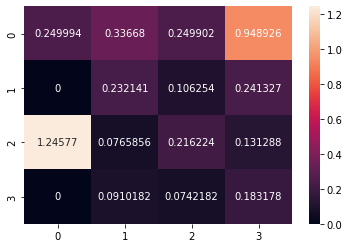

In [ ]:
new_cov = np.array(covlist)
new = new_cov.reshape(4, 4)
print(new)
sns.heatmap(new, annot=True, fmt = 'g')
plt.show()

In [ ]:
X = data.iloc[:, :-1].values
X
y = data[['Discharge_Status']].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

[[396  41]
 [ 49  79]]


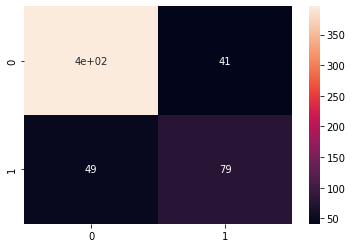

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
ac = accuracy_score(y_test, y_pred)
ac

0.8407079646017699

##Mutual Information Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [ ]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.005581
Feature 1: 0.008111
Feature 2: 0.018463
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.025756
Feature 7: 0.074287
Feature 8: 0.018122
Feature 9: 0.112135
Feature 10: 0.011402
Feature 11: 0.003302
Feature 12: 0.006758
Feature 13: 0.012214
Feature 14: 0.019421


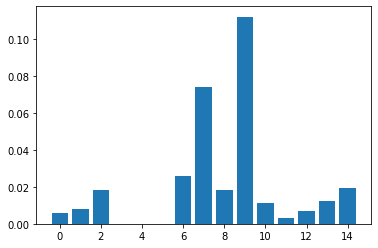

In [ ]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#applying decision tree

In [ ]:
X_new = data[['HasSpecialSection', 'Triage_Level', 'PCR', 'Dialysis', 'Connect_to_Ventilator', 'Age_Category']].values
X_new
y_new = data[['Discharge_Status']].values
y_new

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_new, y_new, test_size = 0.20, random_state = 0)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train_2 = sc.fit_transform(X_train_1)
# X_test_2 = sc.fit_transform(X_test_1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
classifier.fit(X_train_1, y_train_1)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
y_test_1

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [ ]:
y_prediction = classifier.predict(X_test_1)
y_prediction

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [ ]:
conf_matrix = confusion_matrix(y_test_1, y_prediction)
conf_matrix

array([[419,  18],
       [ 55,  73]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusionmatrix = confusion_matrix(y_test_1, y_prediction)
print(confusionmatrix)
print(classification_report(y_test_1, y_prediction))

[[419  18]
 [ 55  73]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       437
           1       0.80      0.57      0.67       128

    accuracy                           0.87       565
   macro avg       0.84      0.76      0.79       565
weighted avg       0.87      0.87      0.86       565



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision_recall_fscore_support(y_test_1, y_prediction, average = None, labels= [0, 1])

(array([0.88396624, 0.8021978 ]),
 array([0.95881007, 0.5703125 ]),
 array([0.91986828, 0.66666667]),
 array([437, 128]))

In [ ]:
accuracy_score(y_test_1, y_prediction)

0.8707964601769912

In [ ]:
feature_cols = ['HasSpecialSection', 'Triage_Level', 'PCR', 'Dialysis', 'Connect_to_Ventilator', 'Age_Category']

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

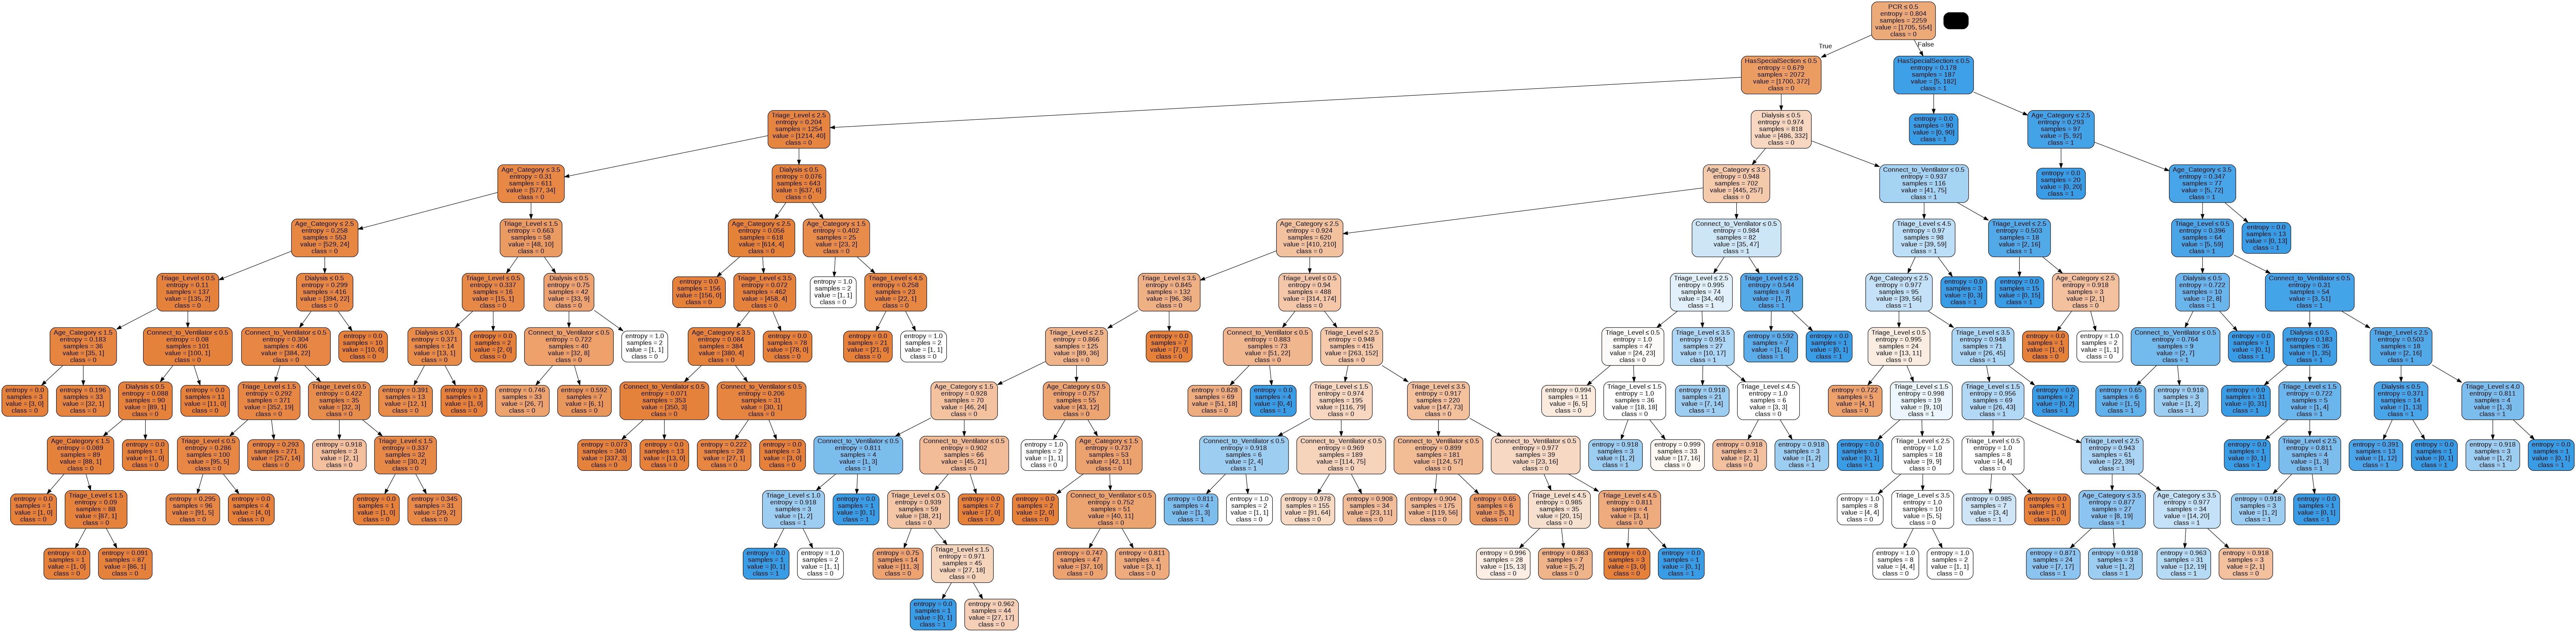

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
from sklearn import tree

In [ ]:
text_representation = tree.export_text(classifier, feature_names=feature_cols)
print(text_representation)

|--- PCR <= 0.50
|   |--- HasSpecialSection <= 0.50
|   |   |--- Triage_Level <= 2.50
|   |   |   |--- Age_Category <= 3.50
|   |   |   |   |--- Age_Category <= 2.50
|   |   |   |   |   |--- Triage_Level <= 0.50
|   |   |   |   |   |   |--- Age_Category <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age_Category >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Triage_Level >  0.50
|   |   |   |   |   |   |--- Connect_to_Ventilator <= 0.50
|   |   |   |   |   |   |   |--- Dialysis <= 0.50
|   |   |   |   |   |   |   |   |--- Age_Category <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age_Category >  1.50
|   |   |   |   |   |   |   |   |   |--- Triage_Level <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Triage_Level >  1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Dialysis >  0.50
|

In [ ]:
from sklearn.tree import _tree

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
rules = get_rules(classifier, feature_cols, y_prediction)
for r in rules:
    print(r)

if (PCR <= 0.5) and (HasSpecialSection <= 0.5) and (Triage_Level > 2.5) and (Dialysis <= 0.5) and (Age_Category > 2.5) and (Triage_Level <= 3.5) and (Age_Category <= 3.5) and (Connect_to_Ventilator <= 0.5) then class: 1 (proba: 99.12%) | based on 340 samples
if (PCR <= 0.5) and (HasSpecialSection <= 0.5) and (Triage_Level <= 2.5) and (Age_Category <= 3.5) and (Age_Category > 2.5) and (Dialysis <= 0.5) and (Connect_to_Ventilator <= 0.5) and (Triage_Level > 1.5) then class: 1 (proba: 94.83%) | based on 271 samples
if (PCR <= 0.5) and (HasSpecialSection > 0.5) and (Dialysis <= 0.5) and (Age_Category <= 3.5) and (Age_Category > 2.5) and (Triage_Level > 0.5) and (Triage_Level > 2.5) and (Triage_Level <= 3.5) and (Connect_to_Ventilator <= 0.5) then class: 1 (proba: 68.0%) | based on 175 samples
if (PCR <= 0.5) and (HasSpecialSection <= 0.5) and (Triage_Level > 2.5) and (Dialysis <= 0.5) and (Age_Category <= 2.5) then class: 1 (proba: 100.0%) | based on 156 samples
if (PCR <= 0.5) and (HasSpe